# Lecture 8 II– Fall 2023

In [1]:
# load your required Librariess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv("world_bank.csv", index_col=0)
df.head()

,Continent,Country,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
0,Africa,Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
1,Africa,Angola,NaN,NaN,NaN,NaN,79.0,67.0,82.0,60.0,...,22.0,52.0,55.0,64.0,NaN,NaN,25.9,28.3,34.0,64.0
2,Africa,Benin,83.0,73.0,50.0,37.0,55.0,31.0,41.0,18.0,...,7.0,20.0,75.0,79.0,23.0,33.0,72.7,25.9,89.0,61.0
3,Africa,Botswana,98.0,101.0,86.0,87.0,96.0,99.0,87.0,89.0,...,39.0,63.0,97.0,95.0,NaN,NaN,NaN,NaN,77.0,62.0
5,Africa,Burundi,58.0,66.0,35.0,30.0,90.0,88.0,89.0,85.0,...,42.0,48.0,93.0,94.0,55.0,43.0,53.8,25.4,91.0,51.0


In [3]:
df.shape

(166, 47)

## Bar Plots

We often use bar plots to display **distributions** of a **categorical variable**.

In the examples below, we plot the distribution of the `"Continent"` column. The cell below uses `.value_counts()` to determine the number of countries corresponding to each continent in the dataset.

## Histograms

You are likely familiar with histograms. A histogram collects continuous data into bins, then plots this binned data. Each bin reflects the density of datapoints with values that lie between the left and right ends of the bin.

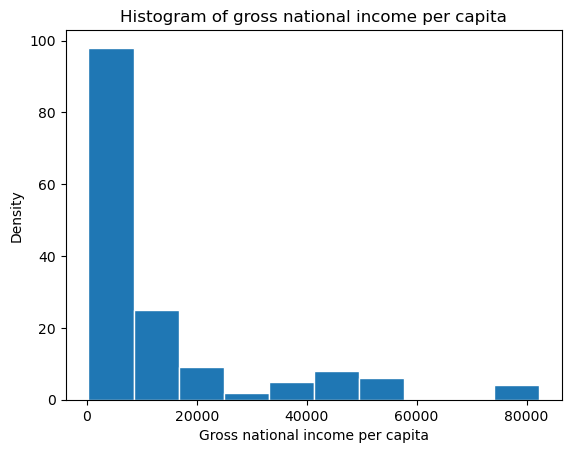

In [4]:
# Drwa histogram of Gross national income
# The `edgecolor` argument controls the color of the bin edges

plt.hist(df['Gross national income per capita, Atlas method: $: 2016'], edgecolor="white")

# Add labels
plt.xlabel("Gross national income per capita")
plt.ylabel("Density")
plt.title("Histogram of gross national income per capita");


c:\Users\Usman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


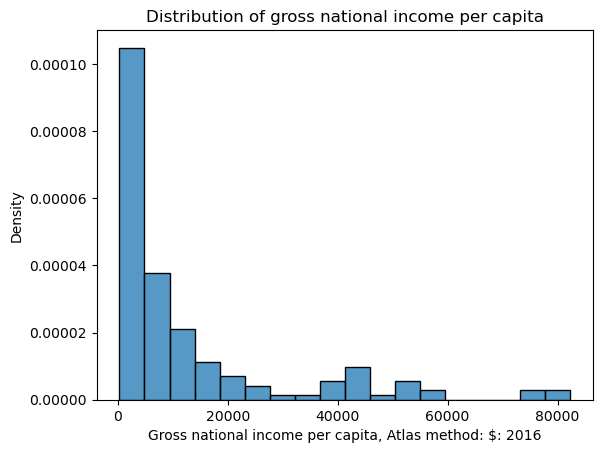

In [5]:
sns.histplot(data=df, x="Gross national income per capita, Atlas method: $: 2016", stat="density")
plt.title("Distribution of gross national income per capita");

We can overlay histograms (or density curves) to compare distributions across qualitative categories.

The `hue` parameter of `sns.histplot` specifies the column that should be used to determine the color of each category. `hue` can be used in many Seaborn plotting functions.

Notice that the resulting plot includes a legend describing which color corresponds to each hemisphere – a legend should always be included if color is used to encode information in a visualization!

In [6]:
# Create a new variable to store the hemisphere in which each country is located i.e. either Northern, Southern 
# country is located i.e. either Northern, Southern
north = ["Asia", "Europe", "N. America"]
south = ["Africa", "Oceania", "S. America"]

df["Hemisphere"] = np.where(df["Continent"].isin(north), "Northern",np.where(df["Continent"].isin(south), "Southern", None))

c:\Users\Usman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'gross national income per capita')

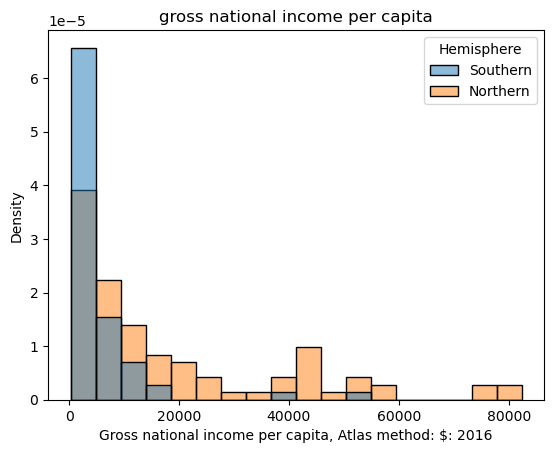

In [7]:
# Create histogram for Gross national Income, usse New created column as hue parameter in .histplot function
a = sns.histplot(data=df, x="Gross national income per capita, Atlas method: $: 2016",stat="density", hue="Hemisphere")
a.set_title("gross national income per capita")
 


Each bin of a histogram is scaled such that its area is equal to the percentage of all datapoints that it contains.

c:\Users\Usman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Gross national income per capita, Atlas method: $: 2016', ylabel='Count'>

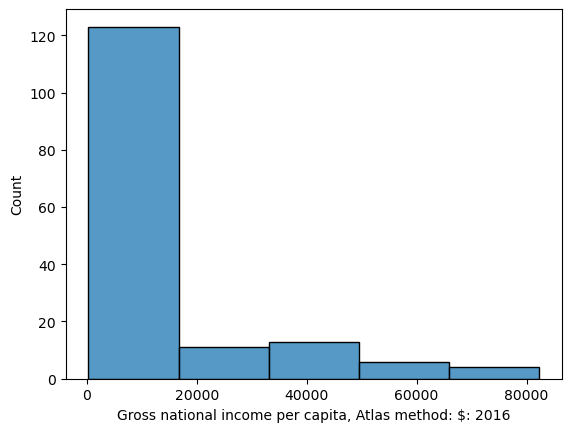

In [8]:
# calculate data points in 1st bin

sns.histplot(data=df,x="Gross national income per capita, Atlas method: $: 2016",bins=5)


We describe a "mode" of a histogram as a peak in the distribution. Often, however, it is difficult to determine what counts as its own "peak." For example, the number of peaks in the distribution of HIV rates across different countries varies depending on the number of histogram bins we plot.

c:\Users\Usman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, '5 histogram bins')

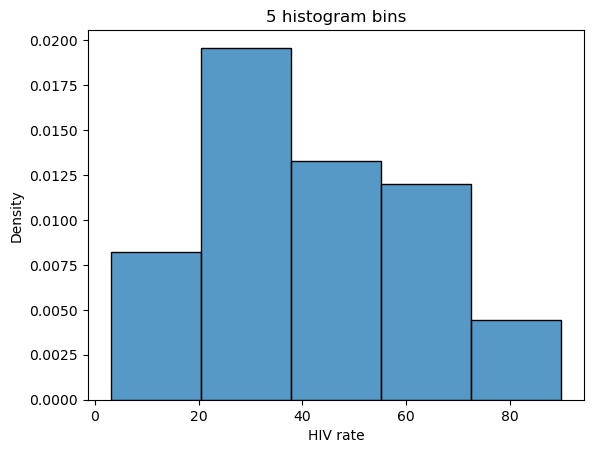

In [9]:
# Rename the very long column name for convenience

df = df.rename(columns={'Antiretroviral therapy coverage: % of people living with HIV: 2015':"HIV rate"})

# With 5 bins, it seems that there is only one peak
a= sns.histplot(data=df, x="HIV rate", stat="density", bins=5)
a.set_title("5 histogram bins")


c:\Users\Usman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, '10 histogram bins')

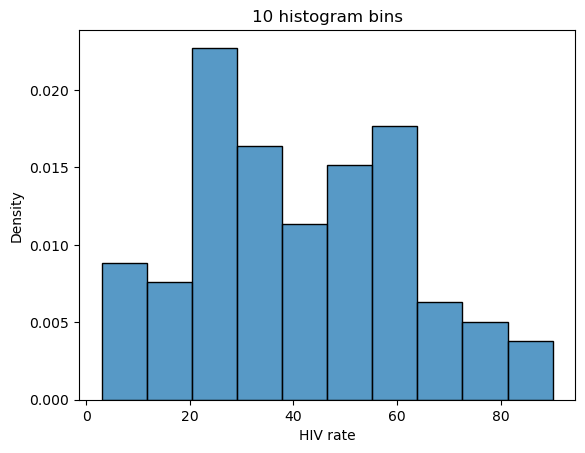

In [10]:
# With 10 bins, there seem to be two peaks
a = sns.histplot(data=df, x="HIV rate", stat="density", bins=10)
a.set_title("10 histogram bins")


c:\Users\Usman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, '5 histogram bins')

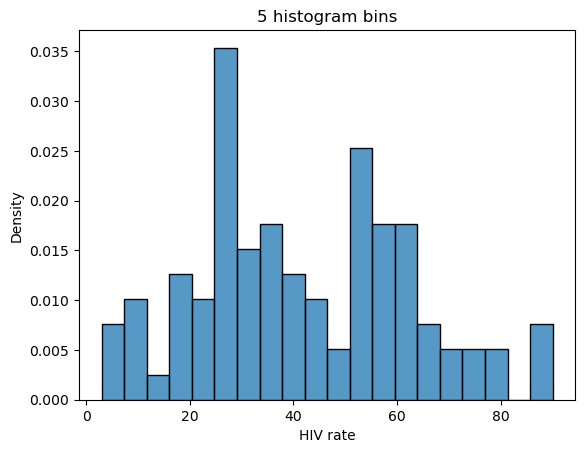

In [11]:
# And with 20 bins, it becomes hard to say what counts as a "peak"!

a = sns.histplot(data=df, x="HIV rate", stat="density", bins=20)
a.set_title("5 histogram bins")


As this example illustrates, it is sometimes more useful to understand the general structure of our data, rather than focus on individual observations. Kernel density estimation helps with this goal.

## Kernel Density Estimation

Kernel density estimation (KDE) allows us to "smooth" a distribution to display general trends and eliminate noisy, distracting detail.

c:\Users\Usman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, '5 histogram bins')

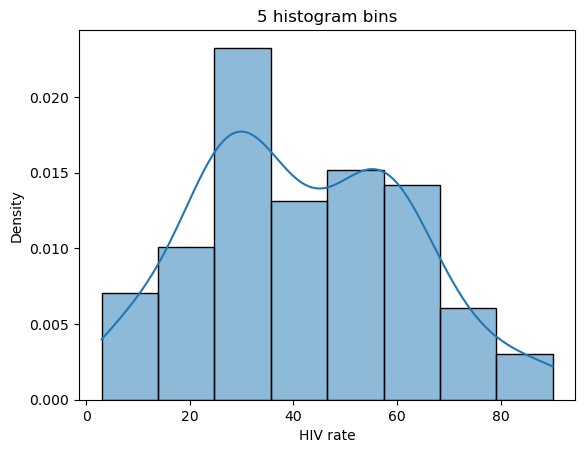

In [12]:
# The smooth curve overlaid on the histogram is a KDE
a= sns.histplot(data=df, x="HIV rate", stat="density", bins=8,kde=True)
a.set_title("5 histogram bins")


To illustrate the process of constructing a KDE curve, we'll use a fake dataset of just five datapoints, contained in the list `points`.

In [13]:
points = [2.2, 2.8, 3.7, 5.3, 5.7]

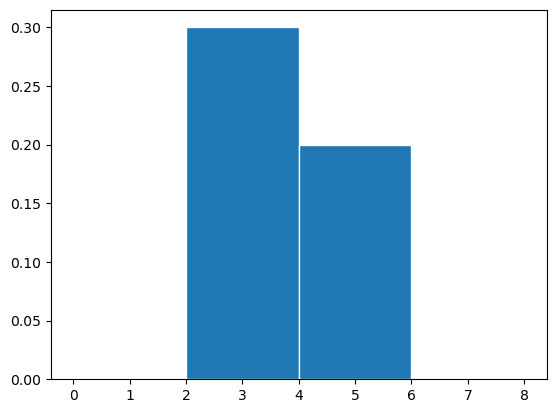

In [14]:
plt.hist(points, bins=range(0, 10, 2), ec='w', density=True);

Let's define some **kernels**. We will explain these formulas momentarily. We'll also define some helper functions for visualization purposes.

In [15]:
def gaussian(x, z, a):
    return (1/np.sqrt(2*np.pi*a**2)) * np.exp((-(x - z)**2 / (2 * a**2)))

def boxcar_basic(x, z, a):
    """Boxcar kernel basic implementation."""
    # Calculate the absolute difference between x and z
    distance = np.abs(x - z)
    
    # Return the kernel value based on the distance
    if distance <= a / 2:
        return 1 / a
    else:
        return 0

def boxcar(x, z, a):
    """Boxcar kernel using a list comprehension."""
    # Calculate the result using list comprehension
    result = [1 / a if np.abs(xi - z) <= a / 2 else 0 for xi in x]
    
    return np.array(result)


In [16]:
def create_kde(kernel, pts, a):
    # Takes in a kernel, set of points, and alpha
    # Returns the KDE as a function
    def kde_func(x):
        return sum(kernel(x, pt, a) for pt in pts) / len(pts) 
    return kde_func



def plot_kde(kernel, pts, a):
    # Calls create_kde and plots the corresponding KDE
    f = create_kde(kernel, pts, a)
    x = np.linspace(min(pts) - 5, max(pts) + 5, 1000)
    y = [f(xi) for xi in x]
    plt.plot(x, y)



def plot_separate_kernels(kernel, pts, a, norm=False):
    # Plot individual kernels
    x = np.linspace(min(pts) - 5, max(pts) + 5, 1000)
    for pt in pts:
        y = kernel(x, pt, a)
        if norm:
            y /= len(pts)
        plt.plot(x, y)
    
    plt.show()


Here are our five points represented as vertical bars.

c:\Users\Usman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


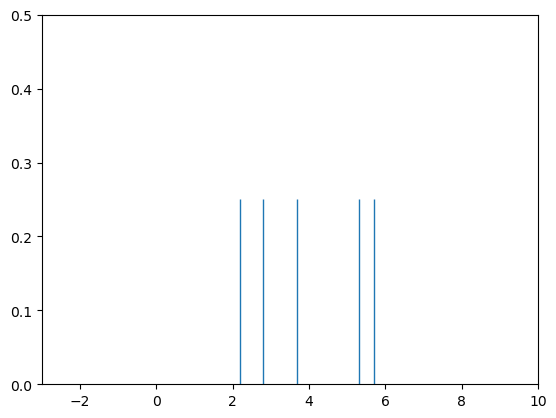

In [17]:
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
sns.rugplot(points, height = 0.5);

### Step 1: Place a kernel at each point

We'll start with the Gaussian kernel.

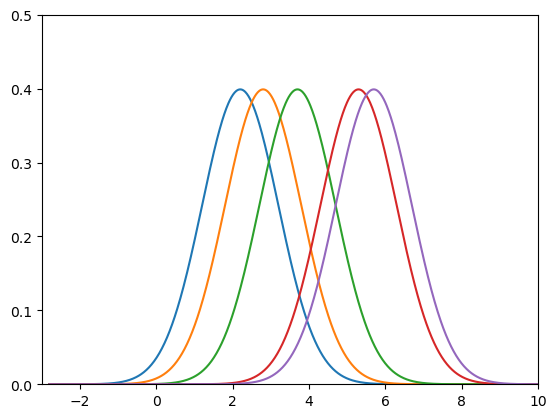

In [18]:
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
plot_separate_kernels(gaussian, points, a = 1)

### Step 2: Normalize kernels so that total area is 1

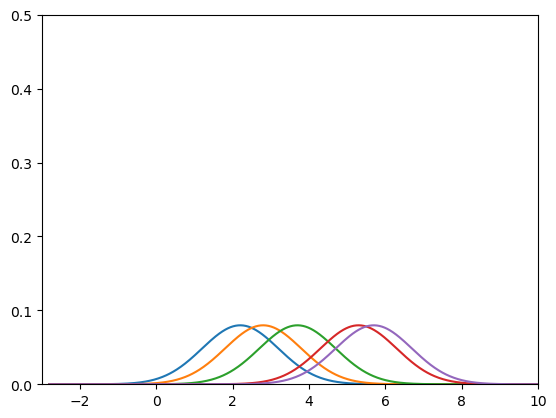

In [19]:
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
plot_separate_kernels(gaussian, points, a = 1, norm = True)

### Step 3: Sum all kernels together

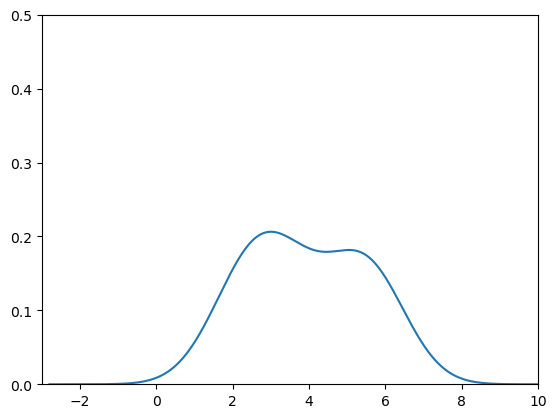

In [20]:
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
plot_kde(gaussian, points, a = 1)

This looks identical to the smooth curve that `sns.distplot` gives us (when we set the appropriate parameter):

c:\Users\Usman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

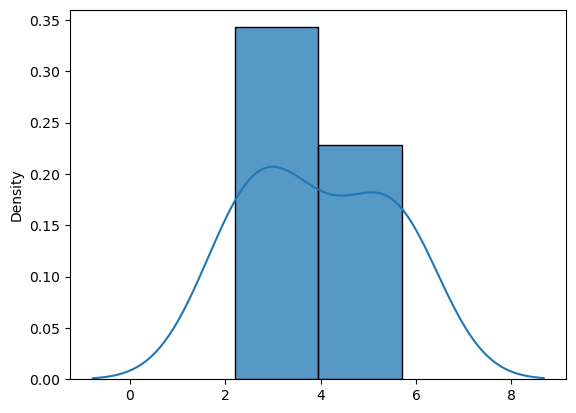

In [21]:
sns.kdeplot(points, bw_method=0.65)  # magic value!
sns.histplot(points, stat='density', bins=2)

You can also get a very similar result in a single call by requesting the KDE be added to the histogram, with `kde=True` and some extra keywords:

c:\Users\Usman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

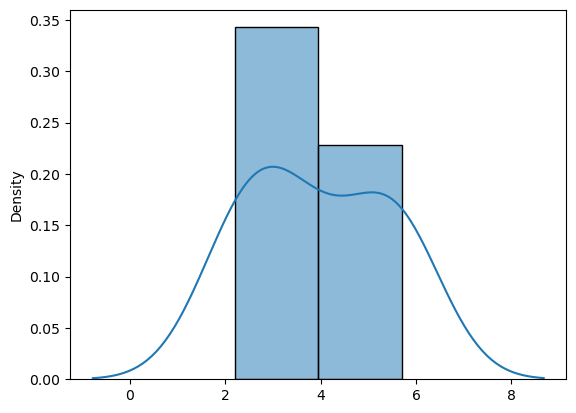

In [22]:
sns.histplot(points, bins=2, kde=True, stat='density',
             kde_kws=dict(cut=3, bw_method=0.65))

c:\Users\Usman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

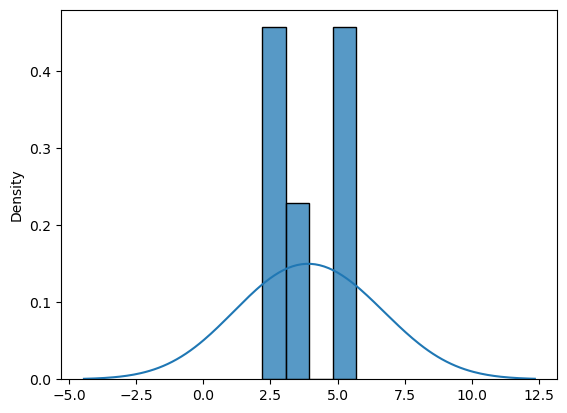

In [23]:
sns.kdeplot(points, bw_adjust=2)
sns.histplot(points, stat='density')

## Kernels

**Gaussian**

$$K_{\alpha}(x, x_i) = \frac{1}{\sqrt{2 \pi \alpha^2}} e^{-\frac{(x - x_i)^2}{2\alpha^2}}$$


**Boxcar**


$$K_{\alpha}(x, x_i) = \begin {cases}
			\frac{1}{\alpha}, \: \: \: |x - x_i| \leq \frac{\alpha}{2}\\
			0, \: \: \: \text{else}
			\end{cases}$$

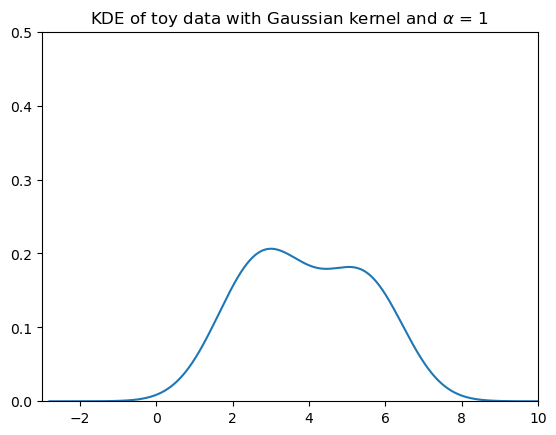

In [24]:
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
plt.title(r'KDE of toy data with Gaussian kernel and $\alpha$ = 1')
plot_kde(gaussian, points, a = 1)

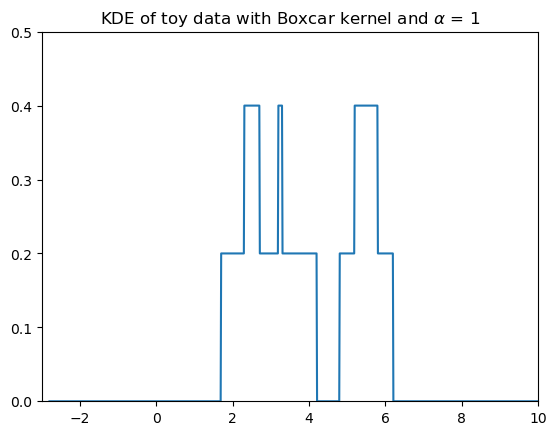

In [25]:
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
plt.title(r'KDE of toy data with Boxcar kernel and $\alpha$ = 1')
plot_kde(boxcar_basic, points, a = 1)

## Effect of bandwidth hyperparameter $\alpha$

Let's bring in some (different) toy data.

In [26]:
tips = sns.load_dataset('tips')

In [27]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [28]:
vals = tips['total_bill']

c:\Users\Usman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


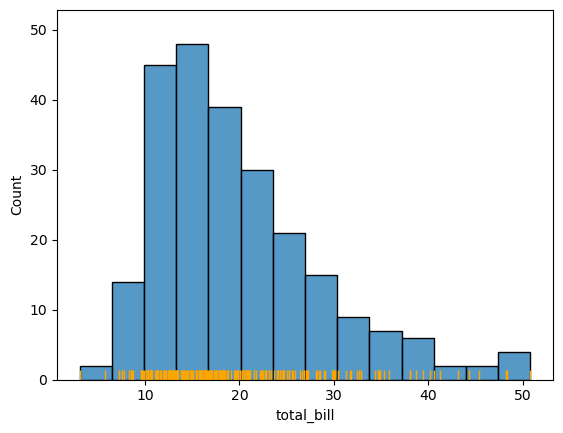

In [29]:
ax = sns.histplot(vals)
sns.rugplot(vals, color='orange', ax=ax);

### KDE Formula

$$f_{\alpha}(x) = \sum_{i = 1}^n \frac{1}{n} \cdot K_{\alpha}(x, x_i) =  \frac{1}{n} \sum_{i = 1}^n K_{\alpha}(x, x_i)$$

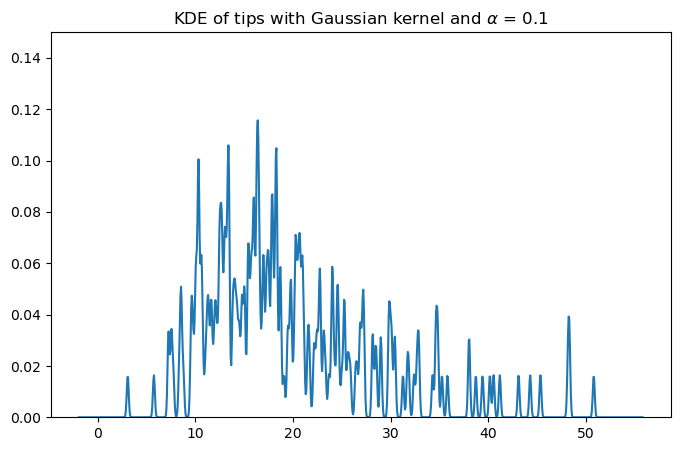

In [30]:
plt.figure(figsize=(8, 5))
plt.ylim(0, 0.15)
plt.title(r'KDE of tips with Gaussian kernel and $\alpha$ = 0.1')
plot_kde(gaussian, vals, a = 0.1)

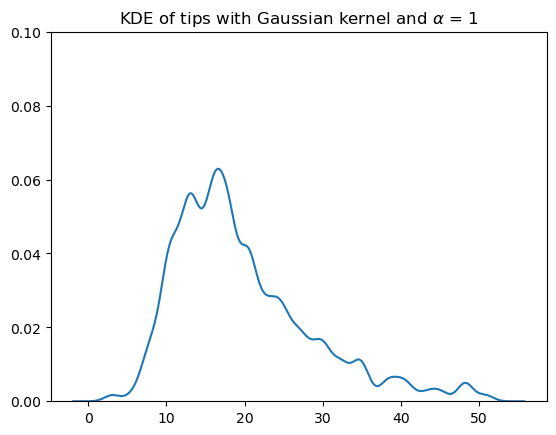

In [31]:
plt.ylim(0, 0.1)
plt.title(r'KDE of tips with Gaussian kernel and $\alpha$ = 1')
plot_kde(gaussian, vals, a = 1)

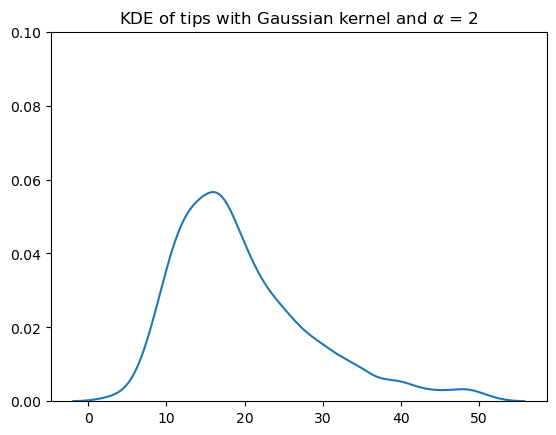

In [32]:
plt.ylim(0, 0.1)
plt.title(r'KDE of tips with Gaussian kernel and $\alpha$ = 2')
plot_kde(gaussian, vals, a = 2)

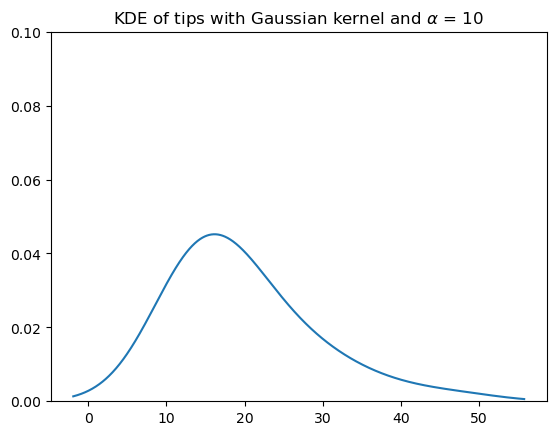

In [33]:
plt.ylim(0, 0.1)
plt.title(r'KDE of tips with Gaussian kernel and $\alpha$ = 10')
plot_kde(gaussian, vals, a = 5)